In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani

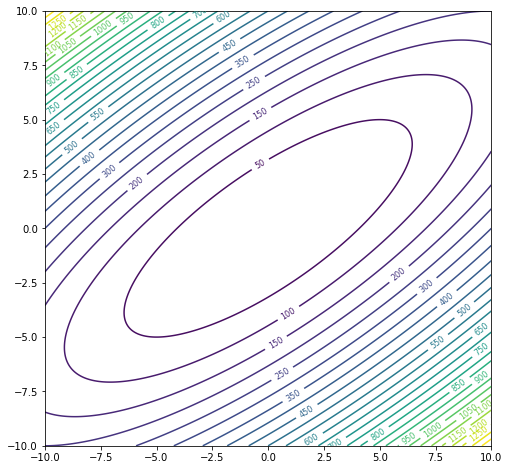

In [26]:
# グラフの範囲を指定
x_low  = -10
x_high = 10
y_low  = -10
y_high = 10

# 格子状に分割した各座標を作成
X = np.linspace(x_low, x_high, 1000)
Y = np.linspace(y_low, y_high, 1000)
X, Y = np.meshgrid(X, Y)

# 関数に従い曲面を作成
Z = (3 * X ** 2) + (5 * Y ** 2) - (6 * X * Y)

# 曲面の描画
plt.figure(figsize=(8, 8))
interval = np.arange(np.min(Z), np.max(Z), 50) # intervalを設定することで等高線を自由に設定できる
counter_plane = plt.contour(X, Y, Z, interval)
plt.clabel(counter_plane, inline=1, fontsize=8)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
plt.close()

## 勾配の計算
上記で指定した目的関数の勾配を計算するための関数を定義します

In [27]:
def get_grad_vec(x, y):
    grad_x = 6*x - 6*y
    grad_y = 10*y - 6*x
    return [grad_x, grad_y]

## 勾配降下の計算
任意の初期値から，勾配降下法によって目的関数の値が最小となる$x$, $y$を求めます．学習率lrは0.1とします．勾配の大きさがepsilon（ここでは0.001）より小さくなったら，収束したと判定し繰り返し処理を終了します．NeRFのコードでもすでに学習が完了しているにも関わらず続行しているのがあるのでこちらの考えが適用できるかも

100 : 0.0018602103636333556


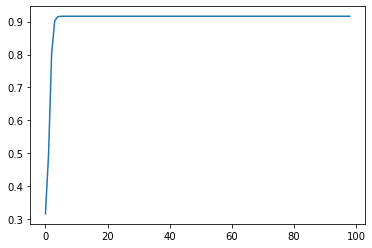

In [55]:
# 初期値の設定
init_x = 2.5
init_y = 7.5

# 学習率・終了条件の設定
lr = 0.05
epsilon = 0.0001

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y
step = 0

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    n_xs = xs - lr * grad_vec[0]
    n_ys = ys - lr * grad_vec[1]

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    step += 1
    if diff < epsilon:       
        break

    xs = n_xs
    ys = n_ys

print(step, ":", diff)

num = 0
diff_rate=[]
for i in range(len(list_diff)-1):
    diff_rate.append(list_diff[i+1]/list_diff[i])
plt.plot(diff_rate)